# Lab 4

## Connect to db

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host = host,
                       user = user,
                       password = pwd,
                       dbname = db
                       )

### 3.1

In [7]:
sql = "select * from student" 


In [8]:
df = pandas.read_sql_query(sql,conn) 

df[:]

/tmp/ipykernel_9717/1979021680.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


### 3.2

In [9]:
sql = """
    select professor.p_name,course.c_name
    from professor 
    inner join course
    on professor.p_email = course.p_email
"""

In [10]:
df = pandas.read_sql_query(sql,conn) 

df[:]

/tmp/ipykernel_9717/1979021680.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


### 3.3

In [15]:
sql = """
select c_number, count(*) as num_student
from enroll 
group by c_number 
"""

/tmp/ipykernel_9717/3510685476.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

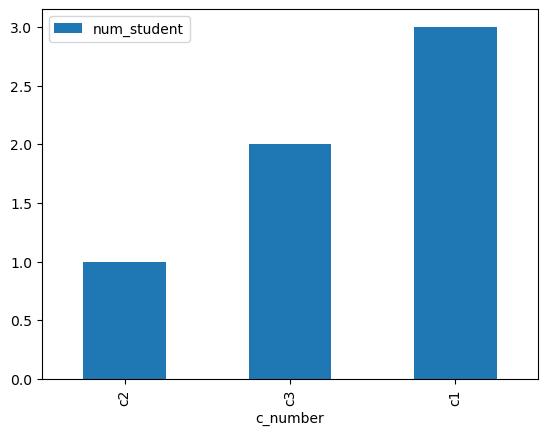

In [16]:
df = pandas.read_sql_query(sql,conn) 
df.plot.bar(x='c_number',y='num_student')

### 3.4

In [17]:
sql = """ select p_name, count(*) as count_course
from professor
inner join course
on professor.p_email = course.p_email
group by p_name"""

/tmp/ipykernel_9717/309519116.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

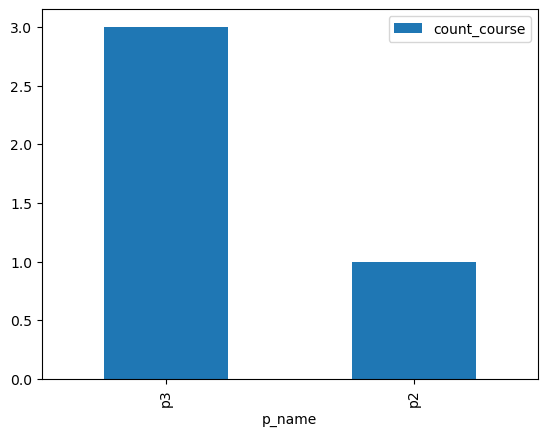

In [19]:
df = pandas.read_sql_query(sql,conn) 
df.plot.bar(x='p_name',y='count_course')

### 3.5

In [20]:
 sql = """
 insert into professor(p_email,p_name,office)
    values('{}','{}','{}')
    """.format('p4@jmu.edu','p4','o4')

print(sql)


insert into professor(p_email,p_name,office)
   values('p4@jmu.edu','p4','o4')
   


In [67]:
cur=conn.cursor()

In [68]:
cur.execute(sql)

In [69]:
df = pandas.read_sql_query('select * from professor',conn)

df[:]

/tmp/ipykernel_9717/73939162.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [70]:
sql = """
 insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
    """.format('c5','linkedin','r2','p4@jmu.edu')

print(sql)


 insert into course(c_number,c_name,room,p_email)
    values('c5','linkedin','r2','p4@jmu.edu')
    


In [71]:
df = pandas.read_sql_query('select * from course',conn)

df[:]

/tmp/ipykernel_9717/220433788.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [72]:
conn.commit()

### 3.6

In [73]:
sql = """
 update course
 set p_email = '{}'
 where p_email = '{}'
 """.format('p4@jmu.edu','p2@jmu.edu') 

In [74]:
cur = conn.cursor()
cur.execute(sql)

In [75]:
df = pandas.read_sql_query('select * from course',conn)

df[:]

/tmp/ipykernel_9717/220433788.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [76]:
conn.commit()

In [77]:
sql = """
 delete from professor 
 where p_email = '{}'
 """.format('p2@jmu.edu') 

In [78]:
cur = conn.cursor()
cur.execute(sql)

In [79]:
df = pandas.read_sql_query('select * from professor',conn)

df[:]

/tmp/ipykernel_9717/73939162.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [80]:
conn.commit()